Executando o Método de Jacobi...
Jacobi convergiu em 474 iterações.
Executando o Método de Gauss-Seidel...
Gauss-Seidel convergiu em 360 iterações.


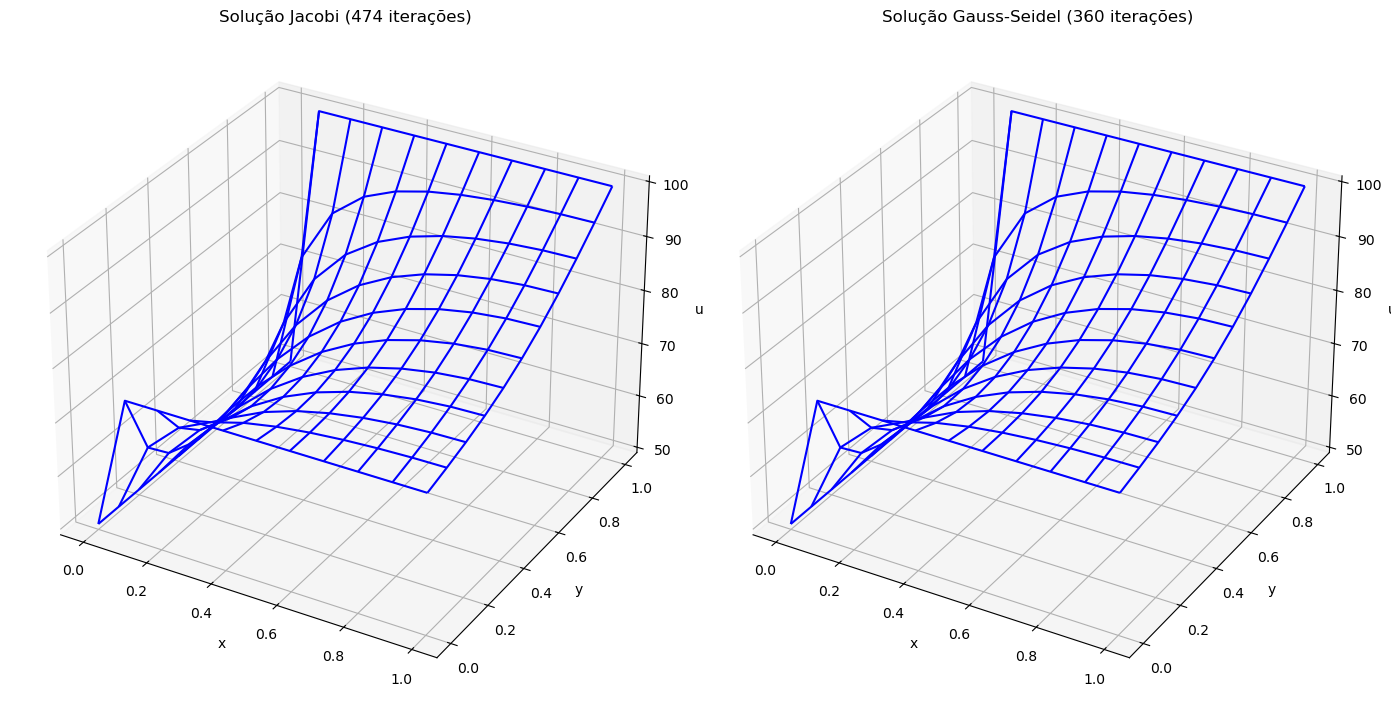


--- Comparação ---
Jacobi: 474 iterações
Gauss-Seidel: 360 iterações


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do Problema
LX = 1.0
LY = 1.0

# Discretização da malha com h=0.1
h = 0.1
NX_total = int(LX / h) + 1
NY_total = int(LY / h) + 1

# Condições de contorno de Dirichlet
u_A = 75.0  # y=0
u_B = 100.0 # y=1
u_C = 50.0  # x=0

# Tolerância e limite de iterações
tol = 1e-8
max_iter = 10000

#  Função para Inicializar a Malha com Condições de Contorno
def initialize_grid(nx, ny, u_a, u_b, u_c):
    ''' Inicializa uma malha de solução com as condições de contorno de Dirichlet. '''
    u_grid = np.zeros((ny, nx))
    u_grid[0, :] = u_a
    u_grid[ny-1, :] = u_b
    u_grid[:, 0] = u_c
    u_grid[0, 0] = u_c
    u_grid[ny-1, 0] = u_c
    u_grid[0, nx-1] = u_a
    u_grid[ny-1, nx-1] = u_b
    return u_grid

''' Método de Jacobi '''
print("Executando o Método de Jacobi...")
u_jacobi = initialize_grid(NX_total, NY_total, u_A, u_B, u_C)

n_jacobi_iter = 0
u_old_jacobi = u_jacobi.copy()

for k in range(max_iter):
    u_new_jacobi = u_old_jacobi.copy()
    
    for j in range(1, NY_total - 1):
        for i in range(1, NX_total):
            if i == NX_total - 1:
                u_new_jacobi[j, i] = 0.25 * (2 * u_old_jacobi[j, i-1] + u_old_jacobi[j+1, i] + u_old_jacobi[j-1, i])
            else:
                u_new_jacobi[j, i] = 0.25 * (u_old_jacobi[j, i+1] + u_old_jacobi[j, i-1] + u_old_jacobi[j+1, i] + u_old_jacobi[j-1, i])

    error_rel = np.linalg.norm(u_new_jacobi - u_old_jacobi) / np.linalg.norm(u_new_jacobi)
    if error_rel < tol:
        n_jacobi_iter = k + 1
        u_jacobi = u_new_jacobi
        break
    u_old_jacobi = u_new_jacobi.copy()

print(f"Jacobi convergiu em {n_jacobi_iter} iterações.")

''' Método de Gauss-Seidel '''
print("Executando o Método de Gauss-Seidel...")
u_gauss_seidel = initialize_grid(NX_total, NY_total, u_A, u_B, u_C)

n_gs_iter = 0

for k in range(max_iter):
    u_old_gs = u_gauss_seidel.copy()
    
    for j in range(1, NY_total - 1):
        for i in range(1, NX_total):
            if i == NX_total - 1:
                u_gauss_seidel[j, i] = 0.25 * (2 * u_gauss_seidel[j, i-1] + u_old_gs[j+1, i] + u_old_gs[j-1, i])
            else:
                u_gauss_seidel[j, i] = 0.25 * (u_old_gs[j, i+1] + u_gauss_seidel[j, i-1] + u_old_gs[j+1, i] + u_old_gs[j-1, i])

    error_rel = np.linalg.norm(u_gauss_seidel - u_old_gs) / np.linalg.norm(u_gauss_seidel)
    if error_rel < tol:
        n_gs_iter = k + 1
        break

print(f"Gauss-Seidel convergiu em {n_gs_iter} iterações.")

''' Plotando as Soluções para Comparação '''
X, Y = np.meshgrid(np.linspace(0, LX, NX_total), np.linspace(0, LY, NY_total))

fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X, Y, u_jacobi, color='blue')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('u')
ax1.set_title(f'Solução Jacobi ({n_jacobi_iter} iterações)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_wireframe(X, Y, u_gauss_seidel, color='blue')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('u')
ax2.set_title(f'Solução Gauss-Seidel ({n_gs_iter} iterações)')

plt.tight_layout()
plt.show()

print("\n--- Comparação ---")
print(f"Jacobi: {n_jacobi_iter} iterações")
print(f"Gauss-Seidel: {n_gs_iter} iterações")